<a href="https://colab.research.google.com/github/govardhan-06/practice-Notebooks/blob/main/pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Architecture of neural network classification system

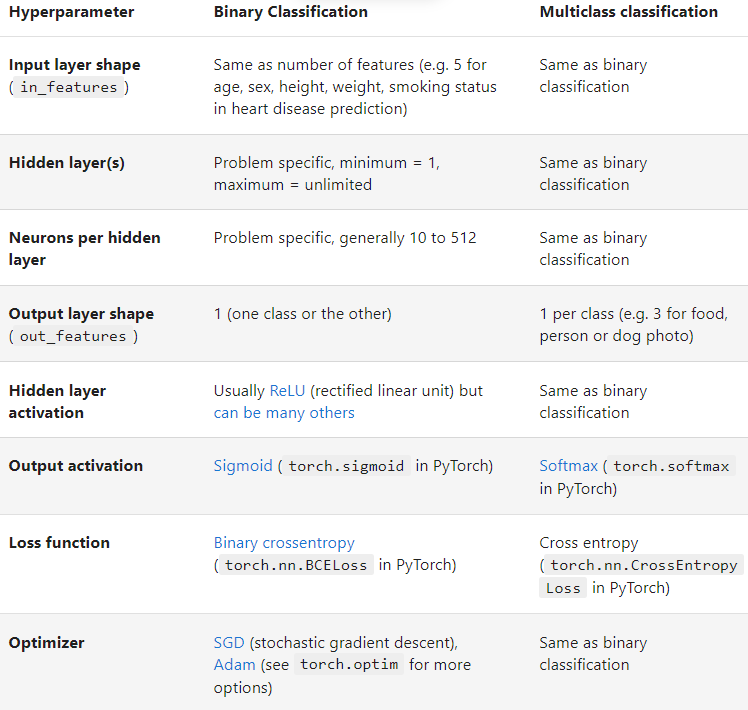

In [ ]:
# Neural Network classification with PyTorch
import sklearn
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
#Create a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


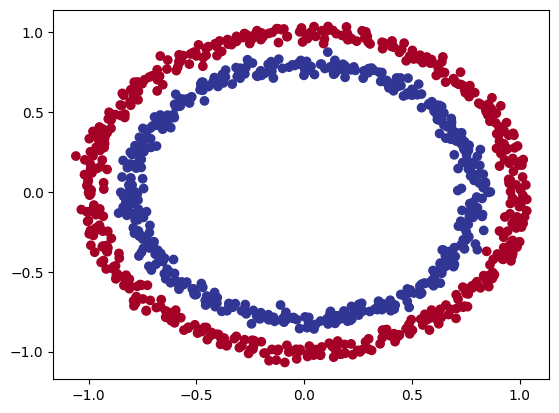

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Check input and output shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example of features and labels
X_sample=X[0]
y_sample=y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### Converting data to tensors

In [ ]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
type(X),X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
#Turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train),len(y_test)

(800, 200)

### Building a Model

To do so, we want to:

1. Setup device agnostic code so our code will run on an accelerator(GPU) if there is one
2. Construct a model(by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### subclassing nn.Module for complex neural networks

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    #out features of first layer must be equal to the in features of the second layer
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

### Recreating the above model using nn.Sequential

In [ ]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2643, -0.4794],
                      [ 0.0898,  0.6677],
                      [-0.6868,  0.2757],
                      [ 0.2020, -0.1266],
                      [-0.3964, -0.3674]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.6772, -0.4266, -0.0490, -0.6886, -0.6622], device='cuda:0')),
             ('1.weight',
              tensor([[0.4231, 0.4298, 0.3600, 0.0814, 0.0901]], device='cuda:0')),
             ('1.bias', tensor([0.1761], device='cuda:0'))])

In [ ]:
#Make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"First 10 predictions: {untrained_preds[:10]}")
print(f"First 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])
First 10 predictions: tensor([[ 0.2850],
        [ 0.2785],
        [ 0.1834],
        [ 0.3143],
        [-0.0050],
        [-0.0075],
        [ 0.1235],
        [ 0.0560],
        [ 0.1915],
        [ 0.2760]], device='cuda:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Setting up the loss function and optimizer

* Selection of loss function and optimizer is problem specific

1. For regression: MAE,MSE
2. For classification: Binary Cross Entropy or Categorical Cross Entropy

* Loss function(most commonly used):
1. Adam
2. SGD

In [ ]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

### Train a Model

1. Forward pass
2. Calculate the loss
3. Optimizer_zero grad
4. Loss backward
5. Optimizer(gradient descent)

#### Facts:
* model outputs are reffered to as **logits**
* We can convert logits to prediction probabilities by passing them to some kind of activation function like sigmoid(binary classification) or softmax(softmax for multiclass predictions)
* Then we can convert the probabilities to predicition labels by rounding them using argmax()


In [ ]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.2850],
        [ 0.2785],
        [ 0.1834],
        [ 0.3143],
        [-0.0050]], device='cuda:0')

In [ ]:
#Use sigmoid activation function to convert logits to prediction probabilities
y_pred_prob=torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.5708],
        [0.5692],
        [0.5457],
        [0.5779],
        [0.4988]], device='cuda:0')

### Logic used for the below conversion
* y_pred_prob>=0.5 then 1
or else 0

In [ ]:
#Converting probabilities to prediction labels
y_preds=torch.round(y_pred_prob)
y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

In [ ]:
#rTrain

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_0.train()

for epoch in range(epochs):
  model_0.train()

  #Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    if epoch%10==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
      print(test_pred[:10])

Epoch: 0 | Loss: 0.69697, Accuracy: 59.25% | Test loss: 0.69900, Test acc: 55.00%
tensor([1., 1., 1., 1., 0., 0., 1., 1., 1., 1.], device='cuda:0')
Epoch: 10 | Loss: 0.69480, Accuracy: 52.00% | Test loss: 0.69691, Test acc: 51.50%
tensor([1., 1., 1., 1., 0., 0., 1., 0., 1., 1.], device='cuda:0')
Epoch: 20 | Loss: 0.69411, Accuracy: 51.38% | Test loss: 0.69616, Test acc: 51.50%
tensor([1., 1., 1., 1., 0., 0., 1., 0., 1., 1.], device='cuda:0')
Epoch: 30 | Loss: 0.69379, Accuracy: 50.62% | Test loss: 0.69576, Test acc: 50.00%
tensor([1., 1., 1., 1., 0., 0., 1., 0., 1., 1.], device='cuda:0')
Epoch: 40 | Loss: 0.69358, Accuracy: 51.00% | Test loss: 0.69549, Test acc: 49.50%
tensor([1., 1., 1., 1., 0., 0., 1., 0., 1., 1.], device='cuda:0')
Epoch: 50 | Loss: 0.69343, Accuracy: 50.75% | Test loss: 0.69528, Test acc: 50.50%
tensor([1., 1., 1., 1., 0., 0., 1., 0., 1., 1.], device='cuda:0')
Epoch: 60 | Loss: 0.69332, Accuracy: 50.25% | Test loss: 0.69513, Test acc: 50.50%
tensor([1., 1., 1., 1., 

In [27]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

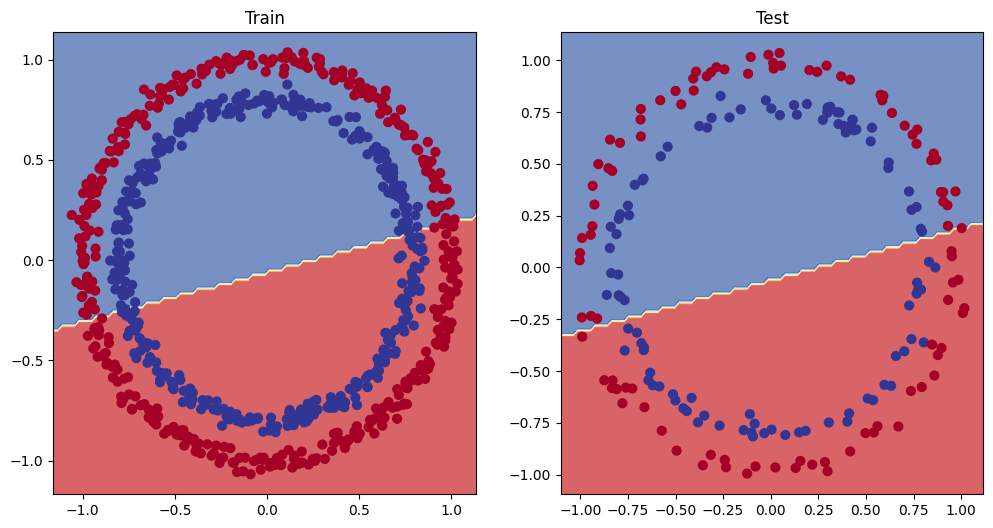

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)


### Improve the model

* Add more layers
* More hidden layers
* Fit for longer
* Changing activation fn, optimizer, learning rate, loss function

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_2=CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3041, -0.0775],
                      [-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910],
                      [-0.6231,  0.2968],
                      [-0.1061, -0.3239],
                      [ 0.6074,  0.1576],
                      [-0.3912, -0.3579]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.0338,  0.3948, -0.1807, -0.4035, -0.2421, -0.5283,  0.2522,  0.5473,
                      -0.6657,  0.1642], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1634,  0.0573, -0.1126,  0.1651,  0.1662,  0.1182, -0.0556, -0.0837,
                        0.0338, -0.0559],
                      [-0.0942,  0.2021,  0.2718, -0.0313, -0.0708,  0.0046, -0.0189,  0.0760,
                        0.0886, -0.2872],
                      [-0.1167,  0.266

In [ ]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=100

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_2.train()
  y_logits=model_2(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits=model_2(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69528, Accuracy: 51.38% | Test loss: 0.69252, Test acc: 50.50%
Epoch: 10 | Loss: 0.69448, Accuracy: 50.75% | Test loss: 0.69230, Test acc: 51.00%
Epoch: 20 | Loss: 0.69408, Accuracy: 50.25% | Test loss: 0.69227, Test acc: 50.50%
Epoch: 30 | Loss: 0.69383, Accuracy: 49.38% | Test loss: 0.69231, Test acc: 50.50%
Epoch: 40 | Loss: 0.69367, Accuracy: 49.25% | Test loss: 0.69237, Test acc: 50.50%
Epoch: 50 | Loss: 0.69355, Accuracy: 48.88% | Test loss: 0.69244, Test acc: 51.00%
Epoch: 60 | Loss: 0.69346, Accuracy: 49.00% | Test loss: 0.69252, Test acc: 50.50%
Epoch: 70 | Loss: 0.69339, Accuracy: 48.75% | Test loss: 0.69260, Test acc: 52.00%
Epoch: 80 | Loss: 0.69333, Accuracy: 48.25% | Test loss: 0.69267, Test acc: 52.50%
Epoch: 90 | Loss: 0.69329, Accuracy: 48.50% | Test loss: 0.69275, Test acc: 51.50%


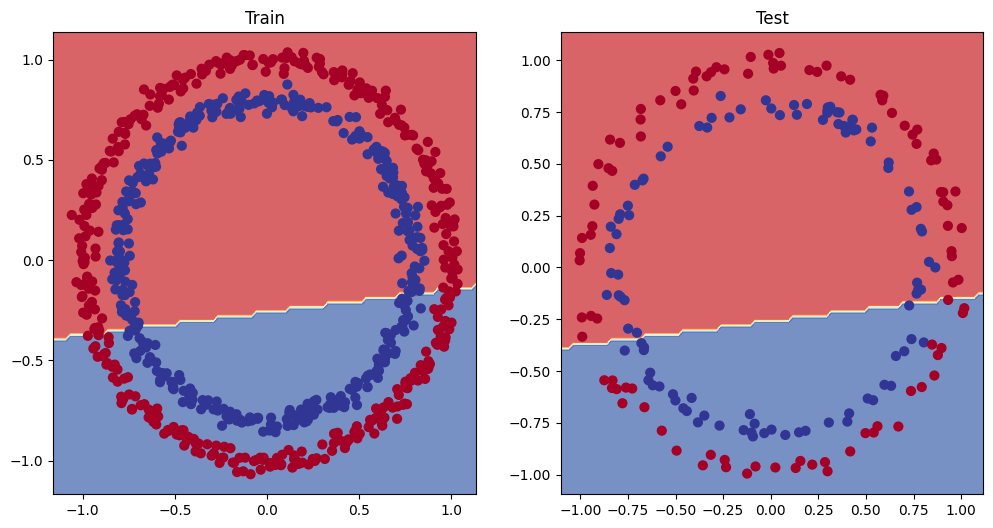

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,X_test,y_test)

In [ ]:
weight=0.7
bias=0.3
start=0
end=1
step=0.01

#Create data
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias

X_regression[:5],y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(X_regression,y_regression,test_size=0.2,random_state=42)


In [ ]:
X_train, y_test

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
         1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
         1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
         1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
         0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
         1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
         0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
         1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
         0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
         1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,

### Adjusting model for a straight line

In [ ]:
model_3=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#Loss and optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

X_train_reg,y_train_reg=X_train_reg.to(device),y_train_reg.to(device)
X_test_reg,y_test_reg=X_test_reg.to(device),y_test_reg.to(device)

for epoch in range(epochs):
  model_3.train()
  y_pred=model_3(X_train_reg).squeeze()
  loss=loss_fn(y_pred,y_train_reg)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_3.eval()
  with torch.inference_mode():
    y_testpred=model_3(X_test_reg)
    test_loss=loss_fn(y_testpred,y_test_reg)
  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.17368 | Test loss: 0.18104
Epoch: 10 | Loss: 0.17368 | Test loss: 0.18105
Epoch: 20 | Loss: 0.17368 | Test loss: 0.18104
Epoch: 30 | Loss: 0.17368 | Test loss: 0.18105
Epoch: 40 | Loss: 0.17368 | Test loss: 0.18104
Epoch: 50 | Loss: 0.17368 | Test loss: 0.18103
Epoch: 60 | Loss: 0.17368 | Test loss: 0.18104
Epoch: 70 | Loss: 0.17368 | Test loss: 0.18103
Epoch: 80 | Loss: 0.17368 | Test loss: 0.18104
Epoch: 90 | Loss: 0.17368 | Test loss: 0.18103


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([80])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


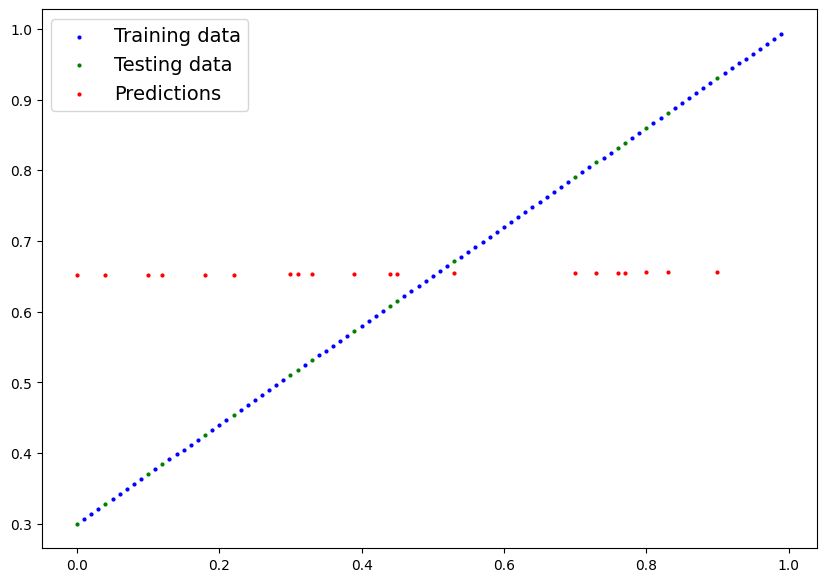

In [ ]:
model_3.eval()

with torch.inference_mode():
  y_preds=model_3(X_test_reg)

X_train_reg=X_train_reg.to("cpu")
X_test_reg=X_test_reg.to("cpu")
y_train_reg=y_train_reg.to("cpu")
y_test_reg=y_test_reg.to("cpu")
y_preds=y_preds.to("cpu")
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg,
                 predictions=y_preds)

### Non-linear functions

#### Recreating non-linear data

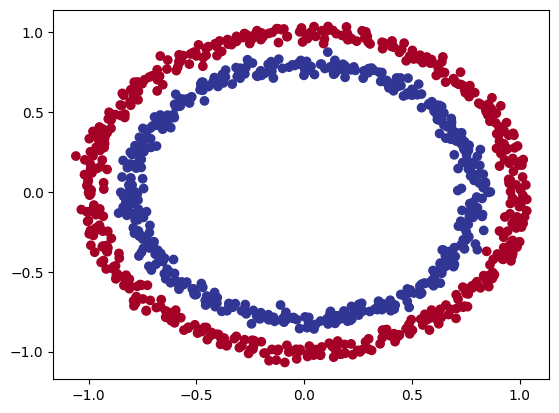

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train[:5],y_train[:5]

(array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        [-0.96657519, -0.22562157],
        [-0.16659009,  0.79944645]]),
 array([1, 0, 0, 0, 1]))

In [ ]:
#Build a model with non-linear activation function
from torch import nn
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

    self.relu=nn.ReLU()
  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_4=CircleModelV3().to(device)
model_4


CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_4.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits=model_4(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.56818, Accuracy: 87.75% | Test loss: 0.57378, Test acc: 86.50%
Epoch: 10 | Loss: 0.56076, Accuracy: 88.50% | Test loss: 0.56745, Test acc: 88.50%
Epoch: 20 | Loss: 0.55314, Accuracy: 89.25% | Test loss: 0.56086, Test acc: 89.50%
Epoch: 30 | Loss: 0.54521, Accuracy: 90.00% | Test loss: 0.55402, Test acc: 89.50%
Epoch: 40 | Loss: 0.53698, Accuracy: 90.75% | Test loss: 0.54690, Test acc: 90.00%
Epoch: 50 | Loss: 0.52849, Accuracy: 91.38% | Test loss: 0.53950, Test acc: 89.50%
Epoch: 60 | Loss: 0.51973, Accuracy: 92.38% | Test loss: 0.53196, Test acc: 89.50%
Epoch: 70 | Loss: 0.51060, Accuracy: 92.75% | Test loss: 0.52411, Test acc: 90.00%
Epoch: 80 | Loss: 0.50114, Accuracy: 93.25% | Test loss: 0.51589, Test acc: 90.00%
Epoch: 90 | Loss: 0.49146, Accuracy: 93.50% | Test loss: 0.50766, Test acc: 89.50%
Epoch: 100 | Loss: 0.48153, Accuracy: 93.50% | Test loss: 0.49935, Test acc: 90.50%
Epoch: 110 | Loss: 0.47130, Accuracy: 94.25% | Test loss: 0.49084, Test acc: 89.50%
Epo

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_4(X_test)))

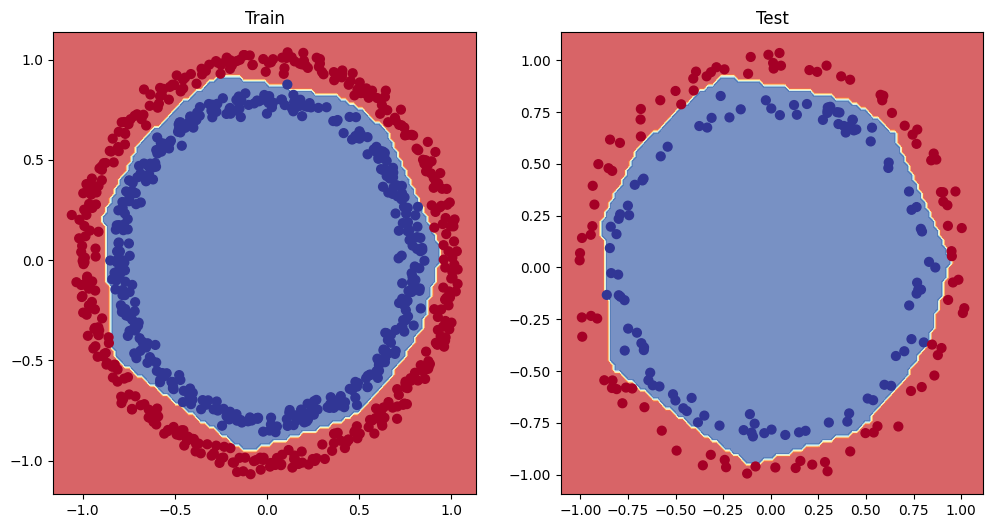

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_test,y_test)

### Non-linear activation functions

In [ ]:
import torch
A=torch.arange(-5.0,9.0)
A.dtype

torch.float32

In [ ]:
A

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [ ]:
def relu(x):
  return torch.max(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7., 8.])

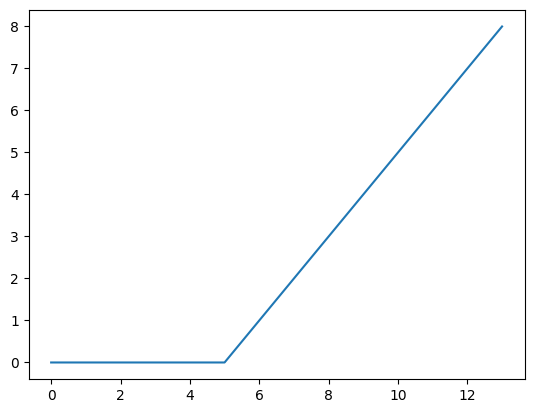

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

sigmoid(A)

tensor([0.0067, 0.0180, 0.0474, 0.1192, 0.2689, 0.5000, 0.7311, 0.8808, 0.9526,
        0.9820, 0.9933, 0.9975, 0.9991, 0.9997])

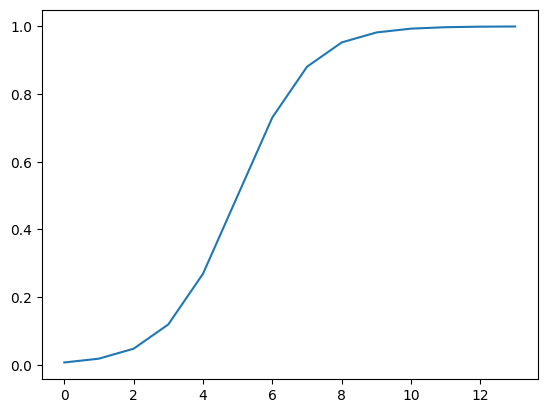

In [ ]:
plt.plot(torch.sigmoid(A))

### Multi-class classification

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


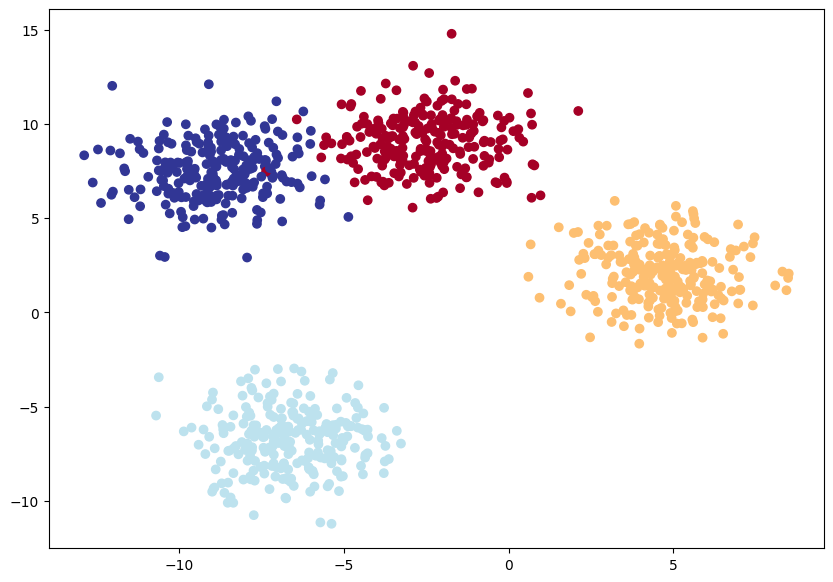

In [1]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [2]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [12]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [13]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [14]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [15]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [16]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [17]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [18]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [19]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

### Evaluating the model

In [22]:
model_4.eval()

with torch.inference_mode():
  y_logits=model_4(X_blob_test)
y_logits[:10]

tensor([[ 6.0798e+00,  1.9280e+01, -2.3210e+01, -1.4836e+01],
        [ 9.8588e+00, -2.4457e+01,  5.9331e+00,  1.8002e+01],
        [-8.3707e+00, -2.2019e+01,  3.0679e+01,  1.7022e+01],
        [ 2.0747e+00,  1.5034e+01, -1.3983e+01, -1.1441e+01],
        [ 1.3377e+01,  3.8314e+00, -2.1642e+01, -3.5185e+00],
        [ 1.1187e+01, -3.0377e+01,  8.6831e+00,  2.2408e+01],
        [-9.4059e+00, -1.5723e+01,  2.7203e+01,  1.2318e+01],
        [ 1.2120e+01, -3.5558e+00, -1.3946e+01,  2.1173e+00],
        [-7.7649e+00, -3.2206e+01,  3.7869e+01,  2.4683e+01],
        [ 1.2362e+01, -7.9819e-01, -1.6486e+01,  2.4211e-02]], device='cuda:0')

In [23]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.8501e-06, 1.0000e+00, 3.5208e-19, 1.5264e-15],
        [2.9076e-04, 3.6357e-19, 5.7359e-06, 9.9970e-01],
        [1.0983e-17, 1.2987e-23, 1.0000e+00, 1.1712e-06],
        [2.3545e-06, 1.0000e+00, 2.5021e-13, 3.1763e-12],
        [9.9993e-01, 7.1496e-05, 6.1822e-16, 4.5950e-08],
        [1.3388e-05, 1.1913e-23, 1.0951e-06, 9.9999e-01],
        [1.2616e-16, 2.2780e-19, 1.0000e+00, 3.4324e-07],
        [9.9995e-01, 1.5565e-07, 4.7838e-12, 4.5281e-05],
        [1.5184e-20, 3.6887e-31, 1.0000e+00, 1.8772e-06],
        [9.9999e-01, 1.9266e-06, 2.9631e-13, 4.3850e-06]], device='cuda:0')

In [25]:
#probabilies to labels
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

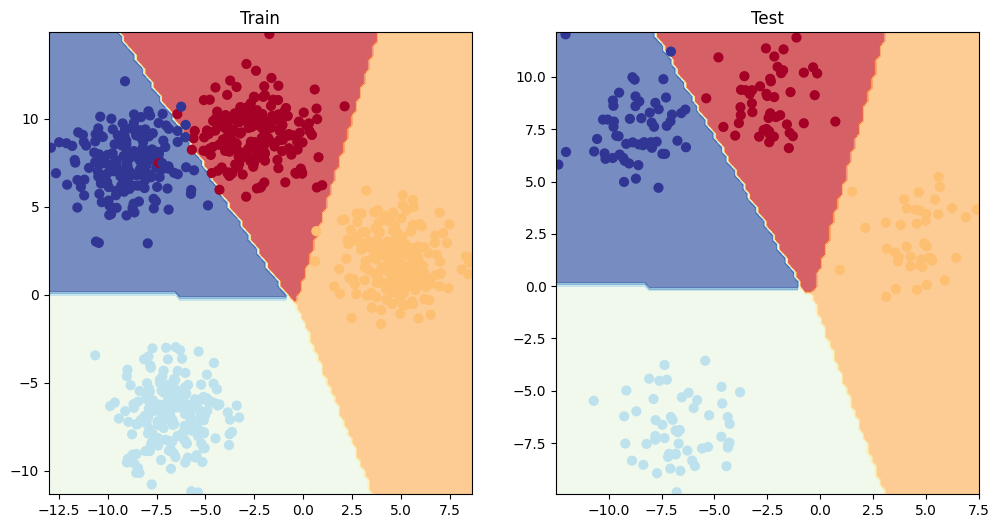

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

### Evaluating the classification models
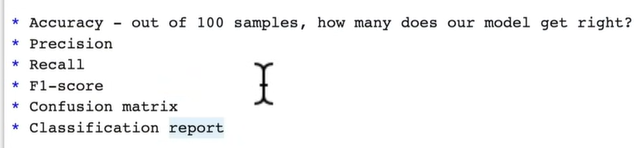

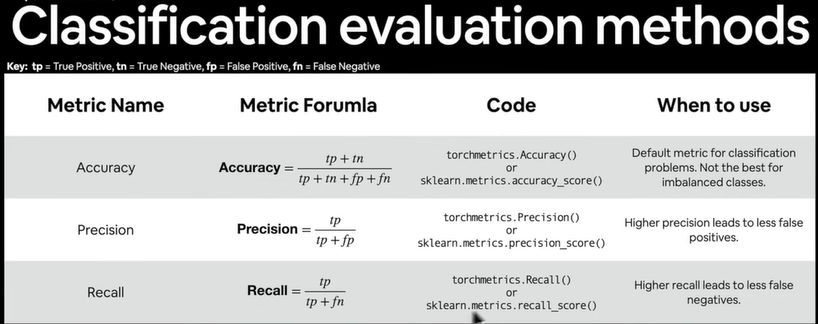